# Create Map of Events of Interest

#### This code grabs location and focal mechanism information from a CSV version of the GCMT catalog, then plots the beach ball diagrams on a map of the area of interest. To show the different types of images Cartopy has, I have included examples below to help you choose which image tiles you would like to use. 

*If you have not installed Cartopy, the instructions to do so are given [here](https://scitools.org.uk/cartopy/docs/latest/installing.html)*

### Import the packages we need to run this code

In [7]:
#!/usr/bin/env python3

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.io.img_tiles as cimgt
import obspy as op
from obspy.imaging.beachball import beach
from obspy.core.utcdatetime import UTCDateTime

### Choose the event criteria and domain you are interested in

In [9]:
# Rectangular spatial Domain
minlat = 35.0
maxlat = 38.0
minlon = -118.5
maxlon = -116.0

# Depths of interest in meters
mindepth_m = 0
maxdepth_m = 50e3

# Magnitude range of interest
minmag = 4.5
maxmag = 7.5

# Time period of interest
mintime = UTCDateTime('2000-01-01')
maxtime = UTCDateTime('2020-10-31')

### Create the event dataset to be plotted.

First, we read in the CSV file containing the GCMT catalogue information into a pandas dataframe. Then, we search the dataframe for events that fit the criteria given in the cell above. Finally, we create and print a new dataframe that only includes the events we're interested in.

In [10]:
df = pd.read_csv('../gcmt_catalogs/gcmt_ext_datetime_catalog.csv', sep=',')
dfs = df [ (df.latitude > minlat) & 
           (df.latitude < maxlat ) &
           (df.longitude > minlon ) &
           (df.longitude < maxlon ) &
           (df.depth_in_meters > mindepth_m) &
           (df.depth_in_meters < maxdepth_m) &
           (df.moment_magnitude > minmag) &
           (df.moment_magnitude < maxmag) &
           (df.time > mintime) &
           (df.time < maxtime) ]

dfs

,id,latitude,longitude,depth_in_meters,origin_time,moment_magnitude,mrr,mtt,mpp,mrt,mrp,mtp,time
3305,3305,36.70,-118.22,15000,38:08.3,5.34,1.870000e+16,-8.430000e+16,6.560000e+16,0.000000e+00,0.000000e+00,-1.070000e+17,1983-01-07T01:38:08.300000Z
3306,3306,36.52,-118.21,15000,24:16.2,5.28,2.690000e+16,-5.070000e+16,2.380000e+16,0.000000e+00,0.000000e+00,-9.730000e+16,1983-01-07T03:24:16.200000Z
4587,4587,37.30,-118.17,10000,21:44.4,5.12,-4.000000e+15,-2.380000e+16,2.780000e+16,3.600000e+16,1.370000e+16,-4.100000e+16,1984-11-26T16:21:44.400000Z
5724,5724,37.55,-118.42,15000,29:50.0,5.77,-3.140000e+17,-2.510000e+17,5.650000e+17,2.250000e+17,-1.120000e+17,1.260000e+17,1986-07-20T14:29:50.000000Z
5728,5728,37.66,-117.92,15000,07:17.7,5.37,-1.100000e+17,-2.020000e+16,1.300000e+17,-4.740000e+16,4.110000e+16,4.410000e+16,1986-07-21T22:07:17.700000Z
10262,10262,36.60,-116.68,15000,14:31.7,5.72,-4.170000e+17,1.190000e+17,2.980000e+17,-1.400000e+17,4.330000e+16,2.720000e+17,1992-06-29T10:14:31.700000Z
10978,10978,36.68,-118.10,15000,20:53.9,6.11,-1.390000e+18,2.200000e+17,1.170000e+18,-5.230000e+17,-7.730000e+17,9.660000e+17,1993-05-17T23:20:53.900000Z
12816,12816,35.85,-118.06,15000,40:04.1,5.40,-9.430000e+16,-4.080000e+16,1.350000e+17,-4.840000e+16,4.560000e+16,7.740000e+16,1995-08-17T22:40:04.100000Z
12903,12903,35.88,-117.80,15000,27:41.8,5.54,-6.500000e+16,-1.690000e+17,2.340000e+17,2.070000e+16,-2.550000e+16,1.540000e+17,1995-09-20T23:27:41.800000Z
13979,13979,35.87,-117.64,15000,17:25.7,5.09,-8.360000e+15,-3.610000e+16,4.440000e+16,5.560000e+15,-1.700000e+16,3.070000e+16,1996-11-27T20:17:25.700000Z


HTTP Error 408: Request Time-outHTTP Error 408: Request Time-outHTTP Error 408: Request Time-outHTTP Error 408: Request Time-out


HTTP Error 408: Request Time-outHTTP Error 408: Request Time-outHTTP Error 408: Request Time-out



HTTP Error 408: Request Time-outHTTP Error 408: Request Time-out

HTTP Error 408: Request Time-outHTTP Error 408: Request Time-outHTTP Error 408: Request Time-out
HTTP Error 408: Request Time-out
HTTP Error 408: Request Time-out


HTTP Error 500: Internal Server Error


### Plot the Map

For the plotting to work correctly, this chunk of code needs to be run in the same cell. An overview of the steps needed to create the plot arer given here, and more detailed explanations are commented within the cell.

- Set up a figure object, making sure the figure size is large enough that we get the resolution we're interested in (this slows down the code, but is necessary),
- Choose the extent of the map to be ±2 degrees lat/lon of the domain we set earlier,
- From Cartopy, download the image tiles that will plot the terrain.,
- Plot the domain edges and the beachball diagrams, and
- Tidy up the plot, then show it below.

This step can take awhile depending on the Zoom level you choose. I find 10 to be fine-scale enough for my application, but you might need to up that number depending. The different tile options you can choose from are shown below, along with the command that will generate a map of that style. Other styles are available [here on the Cartopy website.](https://scitools.org.uk/cartopy/docs/latest/cartopy/io/img_tiles.html)

`terrain = cimgt.GoogleTiles(desired_tile_form='RGB', style='satellite')`
![](GoogleTiles.jpg)
`terrain = cimgt.QuadtreeTiles(desired_tile_form='RGB', user_agent='CartoPy/0.18.0')`
![](QuadtreeTiles.jpg)
`terrain = cimgt.OSM(desired_tile_form='RGB', user_agent='CartoPy/0.18.0')`
![](OSM.jpg)
`terrain = cimgt.Stamen(style='terrain', desired_tile_form='RGB')`
![](Stamen.jpg)
`terrain = cimgt.Stamen(style = 'terrain-background', desired_tile_form='RGB')`
![](stamen_background.jpg)

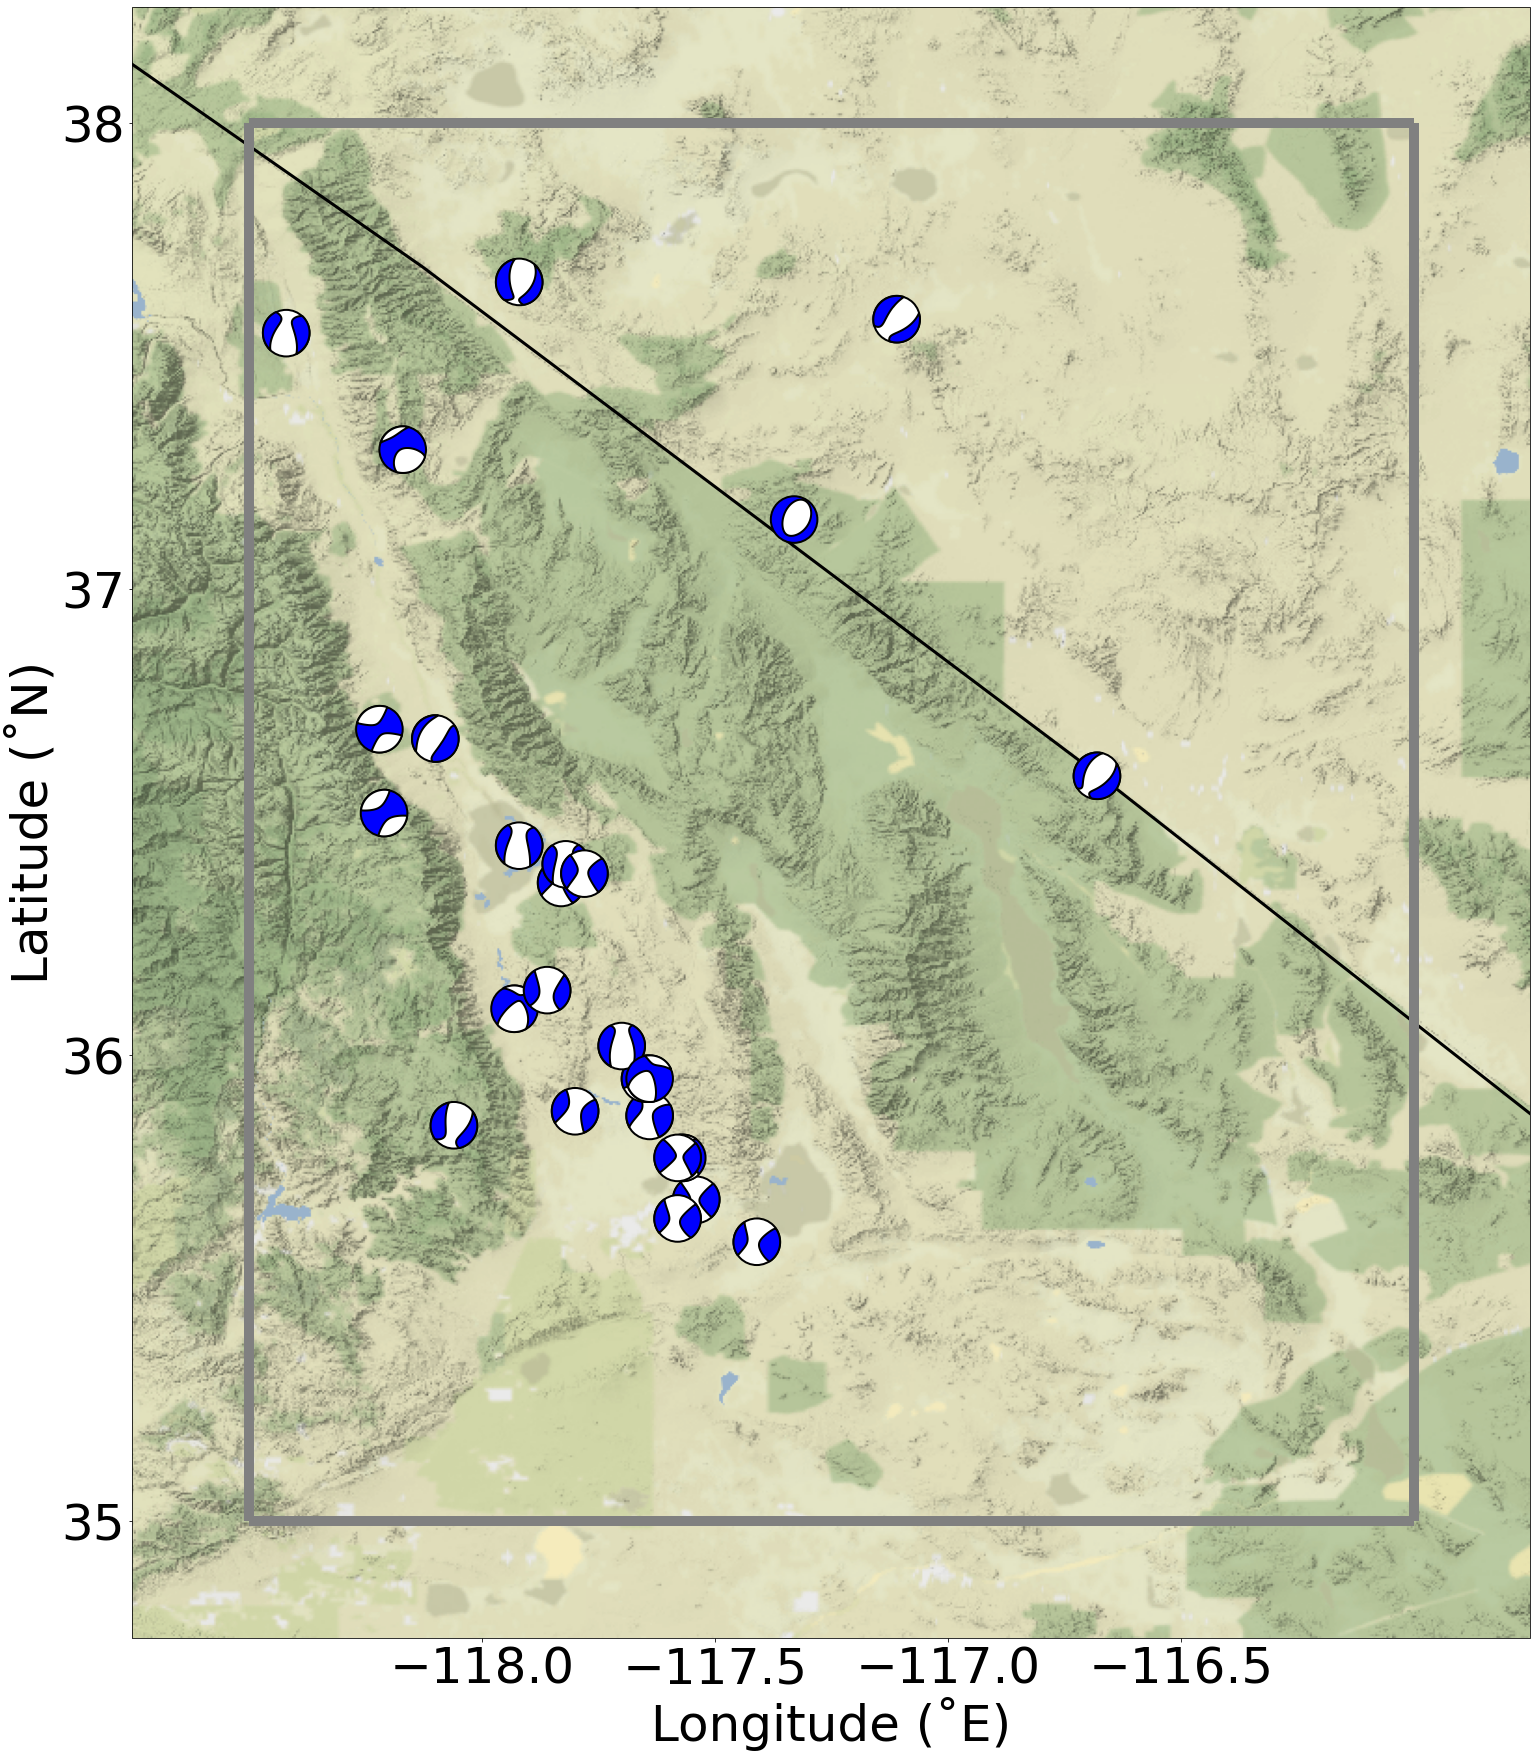

In [35]:
fig = plt.figure(figsize=(30,30))

#Initialize the figure with projection type and extent of the map shown.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minlon-0.25, maxlon+0.25, minlat-0.25, maxlat+0.25], crs=ccrs.PlateCarree())

#Download a terrain image at Zoom Level 10 (higher zoom value = more detail).
terrain = cimgt.Stamen(style = 'terrain-background',desired_tile_form='RGB')
ax.add_image(terrain, 10) 

#Draw coastlines, international borders, and state borders.
ax.coastlines(resolution='10m', color='gray')   
states_provinces = cfeature.NaturalEarthFeature(
                    category='cultural',
                    name='admin_1_states_provinces_lines',
                    scale='10m',
                    facecolor='none')    
ax.add_feature(states_provinces, edgecolor='black', linewidth = 3)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=3)


#Add domain bounding box based off of latitude and longitude values given 
ax.vlines(maxlon, ymin = minlat, ymax= maxlat, linewidth=10, color='gray')
ax.vlines(minlon, ymin = minlat, ymax= maxlat, linewidth=10, color='gray')
ax.hlines(minlat, xmin = minlon, xmax=maxlon, linewidth=10, color='gray')
ax.hlines(maxlat, xmin = minlon, xmax=maxlon, linewidth=10, color='gray')

#Grab moment tensor values from the GCMT CSV file. Then create and plot beachball diagrams.
for index, row in dfs.iterrows():
    mt = [row.mrr, row.mtt, row.mpp, row.mrt, row.mrp, row.mtp]
    beachball = beach(mt, xy = (row.longitude, row.latitude), width = 0.1)
    ax.add_collection(beachball)
    
#Final Touches: Set tick values and labels. Then save the plot as a JPEG.
plt.xticks([-118, -117.5, -117,-116.5], fontsize = 50)
plt.yticks([35,36,37,38], fontsize=50)
plt.xlabel('Longitude (˚E)', fontsize = 50)
plt.ylabel('Latitude (˚N)', fontsize = 50)
plt.show()
